Ньютон: 
 x1= 4.25 
  x2= -2.2  func(x1,x2)= 1.2974999999999959
Итерации:  1 



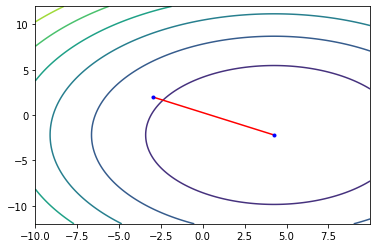

In [2]:
import math
import pylab
import numpy as np
import matplotlib.pyplot as plt
from sympy import diff, symbols

x1, x2 = symbols('x1 x2')

alpha = 1
fout  = list()
eps = 0.0001

X = np.array([-3.,2.])
Xk = np.array([0.,0.])

i = 0

function = x1*x1 - 8.5*x1 + x2*x2 + 4.4*x2 + 24.2

def Func(x11, x22):
    return (x11*x11 - 8.5*x11 + x22*x22 + 4.4*x22 + 24.2)

def Fir_derivative_x1(x, y):
    dif = diff(function, x1)
    res = float(dif.subs([(x1, x), (x2, y)]))
    return(res)

def Fir_derivative_x2(x, y):
    dif = diff(function, x2)
    res = float(dif.subs([(x1, x), (x2, y)]))    
    return(res)

def Sec_derivative_x1x1(x, y):
    dif = diff(function, x1)
    dif2 = diff(dif, x1)
    res = float(dif2.subs([(x1, x), (x2, y)]))    
    return(res)

def Sec_derivative_x1x2(x, y):
    dif = diff(function, x1)
    dif2 = diff(dif, x2)
    res = float(dif2.subs([(x1, x), (x2, y)]))    
    return(res)

def Sec_derivative_x2x1(x, y):
    dif = diff(function, x2)
    dif2 = diff(dif, x1)
    res = float(dif2.subs([(x1, x), (x2, y)]))    
    return(res)

def Sec_derivative_x2x2(x, y):
    dif = diff(function, x2)
    dif2 = diff(dif, x2)
    res = float(dif2.subs([(x1, x), (x2, y)]))    
    return(res)

def makeData():
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-12, 12, 0.01)
    xgrid, ygrid = np.meshgrid(x, y)
 
    zgrid = xgrid**2 - 8.5*xgrid +ygrid**2 + 4.4*ygrid + 24.2
    
    return xgrid, ygrid, zgrid

def Newton():
    global i
    
    gradient = np.array([Fir_derivative_x1(X[0], X[1]),Fir_derivative_x2(X[0], X[1])])

    gessian = np.array([[Sec_derivative_x1x1(X[0], X[1]), Sec_derivative_x1x2(X[0], X[1])],
                    [Sec_derivative_x2x1(X[0], X[1]), Sec_derivative_x2x2(X[0], X[1])]])
 
    gessian2 = np.linalg.inv(gessian)

    p = np.zeros([2])
    p = np.dot(gessian2, gradient)

    Xk[0] = (X[0] - p[0])
    Xk[1] = (X[1] - p[1])
    
    i += 1
    fout.append([Xk[0],Xk[1],Func(Xk[0],Xk[1])])
    gradientcheck = np.array([Fir_derivative_x1(Xk[0], Xk[1]),Fir_derivative_x2(Xk[0], Xk[1])])
    
    if (np.linalg.norm(gradientcheck) > eps) :   
        X[0]=Xk[0]
        X[1]=Xk[1]
        Newton()
        
fout.append([X[0],X[1],Func(X[0],X[1])])
Newton()

print("Ньютон:","\n","x1=", Xk[0],"\n", " x2=", Xk[1], " func(x1,x2)=", Func(Xk[0], Xk[1]))
print("Итерации: ", i, "\n")

x, y, z = makeData()
pylab.contour(x, y, z)
data = np.array(fout)
plt.plot(data[:,0], data[:,1], 'r')
plt.plot(data[:,0], data[:,1], 'b.')
pylab.show()


# Задание № 7.

Выполнил студент группы 428:  
**Галкин Максим Евгеньевич**

## Вариант № 4
Найти точку **минимума** функции

![FUNC](func.png)

методом **Ньютона**. В окрестности точки максимума построить линии уровня и траекторию поиска (на одном графике).

## Теоретическая часть

### Метод Ньютона

Опишем метод Ньютона в общем виде. ![](1.png)
Где ![](2.png) (множество дважды непрерывно дифференцируемых функций в n-мерном пространстве), X - выпуклое замкнутое множество ![](3.png)

Разложим функцию ![](4.png) в ряд Тейлора
![](5.png)
Отбрасывая все члены разложения третьего порядка и выше, получим квадратичную аппроксимацию
f(x):
![](6.png)
Используя квадратичную аппроксимацию функции f(x), сформируем последовательность итераций таким образом, чтобы в точке ![](7.png) градиент аппроксимирующей функции обращается в ноль (в соответствии
с необходимым условием экстремума первого порядка): ![](8.png)
Следовательно, ![](9.png)
Последовательно применяя квадратичную аппроксимацию, построим последовательность {xk} в соответствии с правилом
![](10.png)
При выполнении требования ![](11.png) последовательность {xk} является последовательностью точек минимумов квадратичных функций Fk
k = 0, 1,...<br><br>
Построение последовательности {xk} заканчивается в точке xk, для которой ![](12.png)
где ![](13.png) заданное малое положительное число.


## Практическая часть
Практическая часть.<br>
Программа состоит из нескольких функций:<br><br>
1. Newton - головная часть программы, сам метод Ньютона, в ней происходит вызов всех следующих функций.<br>
2. derivative ф-ии - расчет производных.<br>

В начале выполнения cчитаются производные для градиента и гессиана.<br>
Задается гессиан и градиент заданной функции в заданной точке,находится вектор p. Далее происходит работа программы, которая завершится при условии: значение нормы градиента функции в заданной точке будет меньше заданной погрешности-0.0001. Заново, если нужно, считаюся гессиан и градиент функции, находится вектора p. На выходе: значения x1 и x2 точки минимума, значение функции в этих точках, количество иетраций и график(линии уровня и траектория поиска).

### Результаты
В результате работы программы у функции <br><br> ![](func.png) <br><br>был найден минимум в точке (4.25,-2.2) за ***1*** итерацию.
 ![](graph.png) 